In [174]:
# Dependencies

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import seaborn as sns
import config  
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_regression


# Data exploration & transformation 

In [128]:
# # SQL connection to database
# # retrieve data
# # Conncet to postgresql dataBase table
# protocol = 'postgresql'
# username = 'postgres'
# password = config.password
# host = 'localhost'
# port = 5432
# database_name = 'Project4_db'

# pg_connection = f'{protocol}://{username}:{password}@{host}:{port}/{database_name}'

In [143]:
# read file and display to explore

path = 'Resources/WA_Fn-UseC_-HR-Employee-Attrition.csv'

df = pd.read_csv(path)
pd.options.display.max_columns = None
print(df.shape)
df.head()

(1470, 35)


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [130]:
# Check df info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

Notes:
- 9 objects to convert to Float.
- There is no null values. 
- 

In [131]:

df.describe()


,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [132]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [144]:
# Identify number of unique values in each column
df.nunique(axis=0)

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

In [145]:

# use .map function to encode the labels in the data
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})
df['Gender'] = df['Gender'].map({'Female': 1, 'Male': 0})
df['OverTime'] = df['OverTime'].map({'Yes': 1, 'No': 0})
df['BusinessTravel'] = df['BusinessTravel'].map({'Non-Travel':0, 'Travel_Rarely':1, 'Travel_Frequently':2})
df['Department'] = df['Department'].map({'Sales':0, 'Research & Development':1, 'Human Resources':2})
df['MaritalStatus'] = df['MaritalStatus'].map({'Single':0, 'Divorced':1, 'Married':2})
df['EducationField'] = df['EducationField'].map({'Other':0, 'Life Sciences':1, 'Medical':2, 'Marketing':3, 'Technical Degree':4,'Human Resources':5})
df['JobRole'] = df['JobRole'].map({'Sales Executive':0,'Sales Representative':1,'Laboratory Technician':2,'Manufacturing Director':3,'Healthcare Representative':4,'Manager':5,'Research Scientist':6,'Research Director':7,'Human Resources':8})


df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,1,1102,0,1,2,1,1,1,2,1,94,3,2,0,4,0,5993,19479,8,Y,1,11,3,1,80,0,8,0,1,6,4,0,5
1,49,0,2,279,1,8,1,1,1,2,3,0,61,2,2,6,2,2,5130,24907,1,Y,0,23,4,4,80,1,10,3,3,10,7,1,7
2,37,1,1,1373,1,2,2,0,1,4,4,0,92,2,1,2,3,0,2090,2396,6,Y,1,15,3,2,80,0,7,3,3,0,0,0,0
3,33,0,2,1392,1,3,4,1,1,5,4,1,56,3,1,6,3,2,2909,23159,1,Y,1,11,3,3,80,0,8,3,3,8,7,3,0
4,27,0,1,591,1,2,1,2,1,7,1,0,40,3,1,2,2,2,3468,16632,9,Y,0,12,3,4,80,1,6,3,3,2,2,2,2


In [158]:
clean_df = df.drop(['Over18','EmployeeNumber', 'EmployeeCount', 'StandardHours'], axis = 1)
print(clean_df.shape)
clean_df.head()

(1470, 31)


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,1,1102,0,1,2,1,2,1,94,3,2,0,4,0,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5
1,49,0,2,279,1,8,1,1,3,0,61,2,2,6,2,2,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7
2,37,1,1,1373,1,2,2,0,4,0,92,2,1,2,3,0,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0
3,33,0,2,1392,1,3,4,1,4,1,56,3,1,6,3,2,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0
4,27,0,1,591,1,2,1,2,1,0,40,3,1,2,2,2,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2


In [159]:
# check dtypes again

clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1470 non-null   int64
 1   Attrition                 1470 non-null   int64
 2   BusinessTravel            1470 non-null   int64
 3   DailyRate                 1470 non-null   int64
 4   Department                1470 non-null   int64
 5   DistanceFromHome          1470 non-null   int64
 6   Education                 1470 non-null   int64
 7   EducationField            1470 non-null   int64
 8   EnvironmentSatisfaction   1470 non-null   int64
 9   Gender                    1470 non-null   int64
 10  HourlyRate                1470 non-null   int64
 11  JobInvolvement            1470 non-null   int64
 12  JobLevel                  1470 non-null   int64
 13  JobRole                   1470 non-null   int64
 14  JobSatisfaction           1470 non-null 

All features have been encoded and dtypes converted to int64

In [160]:
# Save clean df in Resources folder

clean_df.to_csv('Resources/ibm_clean_df.csv', encoding= 'utf-8', index= False, header= True)

# Data Analysis

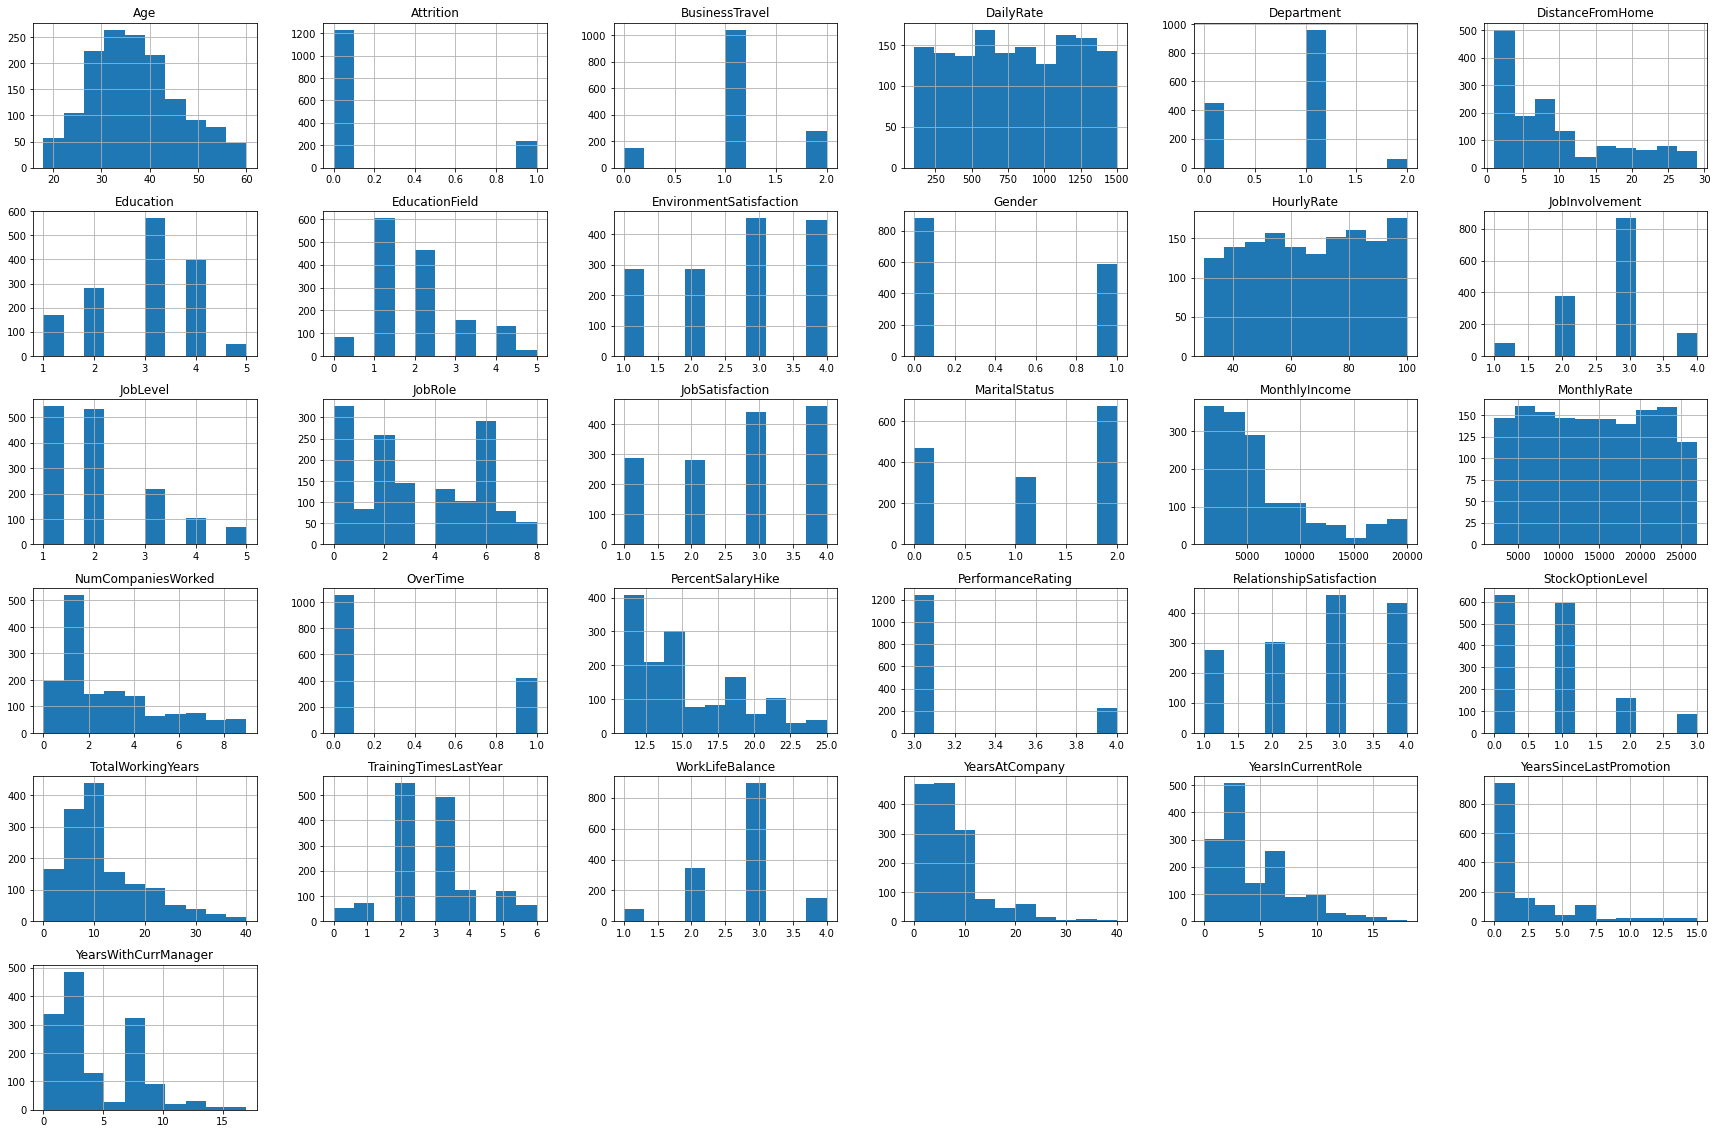

In [161]:
# Display df Historigrams to have an overview of data. 
clean_df.hist(figsize=(30,20))
plt.show()

In [162]:
# Correlation Matrix to make all scatter plots at once

# Create a grid of column pairs with scatter plots for non-diagonal(upper portion)
# sns.PairGrid(df).map_upper(plt.scatter)

In [163]:
# Calculate correlation between features. 
corr_df = clean_df.corr()
corr_df


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,-0.159205,-0.011807,0.010661,0.031882,-0.001686,0.208034,0.006751,0.010146,0.036311,0.024287,0.029820,0.509604,0.112757,-0.004892,0.111831,0.497855,0.028051,0.299635,0.028062,0.003634,0.001904,0.053535,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
Attrition,-0.159205,1.000000,0.127006,-0.056652,-0.063991,0.077924,-0.031373,0.086359,-0.103369,-0.029453,-0.006846,-0.130016,-0.169105,-0.098921,-0.103481,-0.145985,-0.159840,0.015170,0.043494,0.246118,-0.013478,0.002889,-0.045872,-0.137145,-0.171063,-0.059478,-0.063939,-0.134392,-0.160545,-0.033019,-0.156199
BusinessTravel,-0.011807,0.127006,1.000000,-0.015539,0.002640,-0.009696,-0.008670,-0.018430,-0.011310,0.044896,-0.004164,0.029300,-0.011696,-0.003851,0.008666,-0.011068,-0.013450,-0.008440,-0.030743,0.042752,-0.025727,0.001683,0.008926,-0.028257,0.007972,0.016357,0.004209,0.005212,-0.005336,0.005222,-0.000229
DailyRate,0.010661,-0.056652,-0.015539,1.000000,-0.007109,-0.004985,-0.016806,-0.017943,0.018355,0.011716,0.023381,0.046135,0.002966,-0.006912,0.030571,0.063512,0.007707,-0.032182,0.038153,0.009135,0.022704,0.000473,0.007846,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
Department,0.031882,-0.063991,0.002640,-0.007109,1.000000,-0.017225,-0.007996,-0.057197,0.019395,-0.041583,0.004144,0.024586,-0.101963,0.750143,-0.021001,0.030927,-0.053130,-0.023642,0.035882,-0.007481,0.007840,0.024604,0.022414,0.012193,0.015762,-0.036875,-0.026383,-0.022920,-0.056315,-0.040061,-0.034282
DistanceFromHome,-0.001686,0.077924,-0.009696,-0.004985,-0.017225,1.000000,0.021042,0.016556,-0.016075,0.001851,0.031131,0.008783,0.005303,-0.041934,-0.003669,0.031992,-0.017014,0.027473,-0.029251,0.025514,0.040235,0.027110,0.006557,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.031373,-0.008670,-0.016806,-0.007996,0.021042,1.000000,-0.005477,-0.027128,0.016547,0.016775,0.042438,0.101589,0.024950,-0.011296,-0.003299,0.094961,-0.026084,0.126317,-0.020322,-0.011111,-0.024539,-0.009118,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EducationField,0.006751,0.086359,-0.018430,-0.017943,-0.057197,0.016556,-0.005477,1.000000,-0.003926,0.006747,-0.004908,-0.003303,0.012174,-0.032052,-0.048967,0.040575,0.012022,0.001295,0.006959,-0.007777,-0.048057,-0.032419,0.024609,0.026710,0.001367,0.003143,0.019488,0.009311,0.001687,0.012719,0.001673
EnvironmentSatisfaction,0.010146,-0.103369,-0.011310,0.018355,0.019395,-0.016075,-0.027128,-0.003926,1.000000,-0.000508,-0.049857,-0.008278,0.001212,-0.009234,-0.006784,-0.017527,-0.006259,0.037600,0.012594,0.070132,-0.031701,-0.029548,0.007665,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
Gender,0.036311,-0.029453,0.044896,0.011716,-0.041583,0.001851,0.016547,0.006747,-0.000508,1.000000,0.000478,-0.017960,0.039403,-0.007339,-0.033252,-0.013074,0.031858,0.041482,0.039147,0.041924,-0.002733,0.013859,-0.022868,-0.012716,0.046881,0.038787,0.002753,0.029747,0.041483,0.026985,0.030599


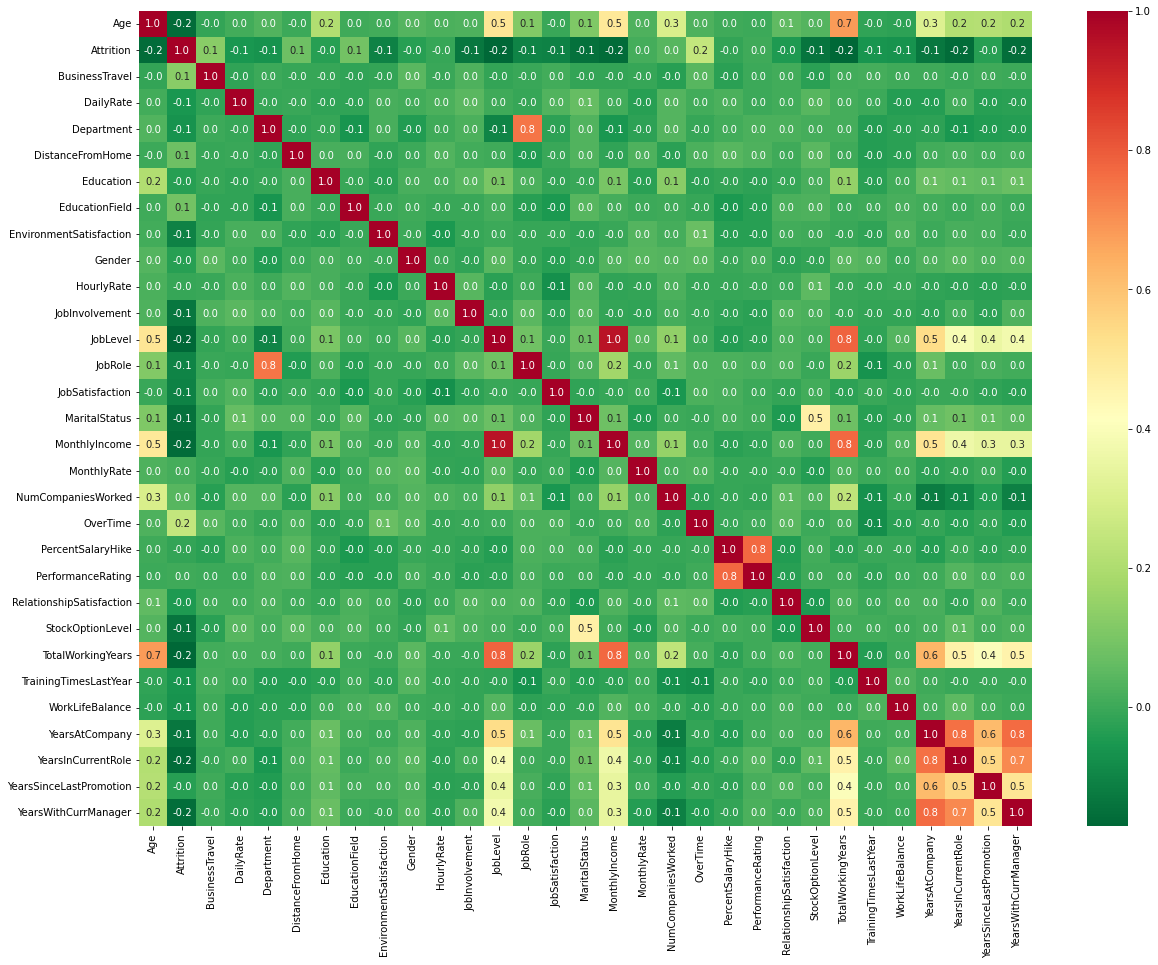

In [165]:
plt.figure(figsize=(20,15))
sns.heatmap(corr_df,annot=True,cbar=True,cmap="RdYlGn_r",fmt='.1f')


No Clear correlation between Attrition and other features

# Preprocessing

In [166]:

X = clean_df.drop(columns = ['Attrition'])
y = clean_df['Attrition']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [167]:
# Scale the data 
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ML training and fitting & running

In [169]:
# Train a Logistic Regression model and print the model score

classifier = LogisticRegression()
classifier

LogisticRegression()

In [170]:
# Fit data and display score with scaled data
classifier.fit(X_train, y_train)
print(f'Training Data Score: {classifier.score(X_train_scaled, y_train)}')
print(f'Testing Data Score: {classifier.score(X_test_scaled, y_test)}')

Training Data Score: 0.588021778584392
Testing Data Score: 0.5842391304347826


c:\Users\jess9\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
c:\Users\jess9\anaconda3\envs\PythonData\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"
c:\Users\jess9\anaconda3\envs\PythonData\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, bu

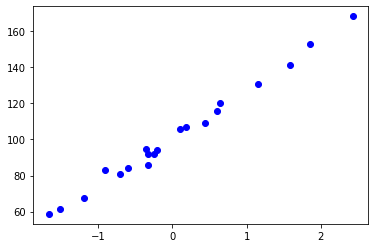

In [175]:

# Run linear regression  
from sklearn.datasets import make_regression

X, y = make_regression(n_samples=20, n_features=1, random_state=5, noise=4, bias=100.0)

plt.scatter(X, y, c='blue')





In [171]:
# Train a Random Forest Classifier model and print the model score using the scaled data
clf = RandomForestClassifier(random_state=5, n_estimators=500).fit(X_train_scaled, y_train)
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

Training Score: 1.0
Testing Score: 0.8315217391304348
